# Gold price prediction


steps:
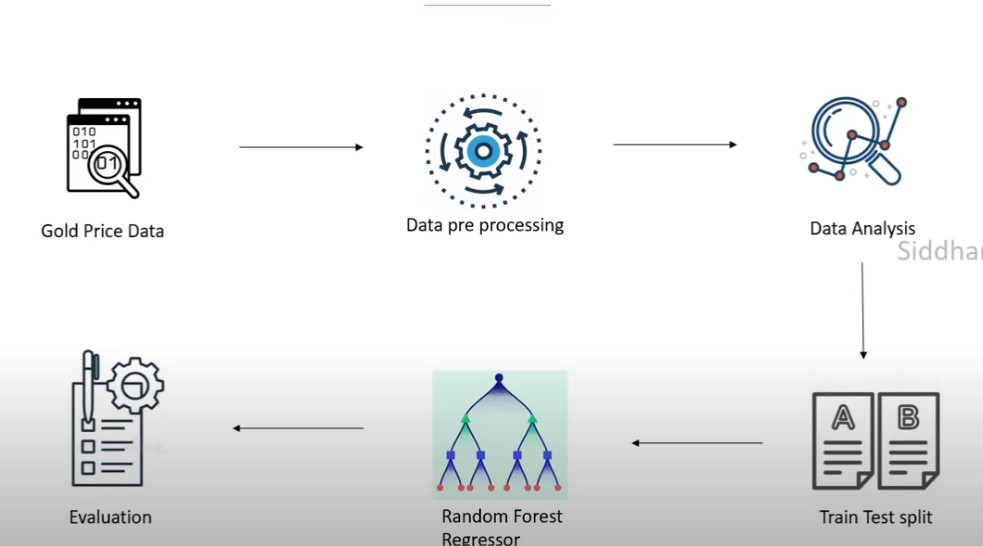

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Datacollection and Data Processing

In [8]:
gold_data=pd.read_csv('gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# Features and its description

(1)Date--->timestamp or date on which the data point was recorded

(2)SPX (S&P 500 Index)--> The S&P 500 Index represents the performance of 500 of the largest companies listed on stock exchanges in the United States  [influence of stock market trends on gold prices]

(3)GLD (Gold ETF)--> price or performance of the SPDR Gold Trust ETF (GLD), which is an exchange-traded fund that tracks the price of gold

(4)USO (United States Oil Fund)-->USO represents an exchange-traded fund that tracks the price of crude oil
                                    [ impact of oil prices on gold prices]

(5)SLV (Silver ETF)---> SLV represents an ETF tracking the price of silver
                        [relationship between gold and silver prices]

(6)EUR/USD (Euro to US Dollar Exchange Rate)--->indicates the strength of the Euro relative to the U.S. Dollar.
                                            [impact of currency exchange rates on gold price]

note: Gold and oil prices can be influenced by similar macroeconomic factors, such as inflation and geopolitical events.

In [9]:
gold_data.shape

(2290, 6)

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#check no of missingvalues
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Correlation


Positive  Correlation:
        When two variables move in the same direction; i.e., when one increases the other also increases and vice-versa
        Relationship between the price and supply
Negative Correlation:
        When two variables move in opposite directions; i.e., when one increases the other decreases, and vice-versa
        relationship between the price and demand, temperature and sale of woollen garments, etc.



In [13]:
correlation=gold_data.corr()

<AxesSubplot:>

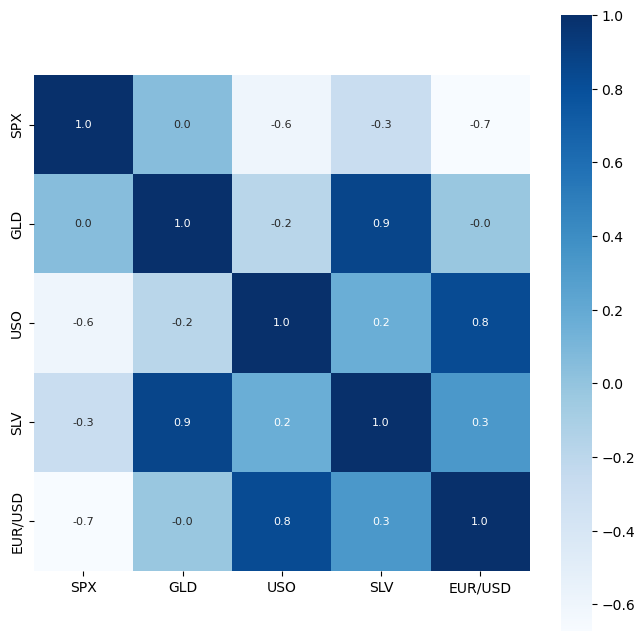

In [14]:
plt.figure(figsize=(8,8))#(width,height)in inch
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

positive value-->positive correlated
negative value-->negative correlated

GLD VS SLV (GOLD VS SILVER)-->0.9(POSITIVELY CORRELATED) if gold price increases,silver price also increases

In [15]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\chand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

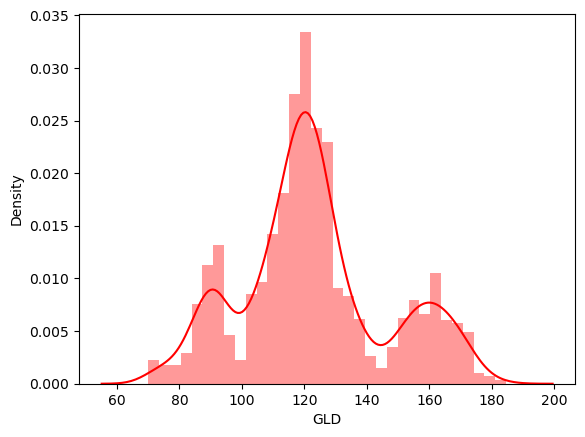

In [16]:
#checking distribution of gold price
sns.distplot(gold_data['GLD'],color='red')

# feature splitting

In [17]:
X=gold_data.drop(['Date','GLD'],axis=1)
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [18]:
Y=gold_data['GLD']
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# training and testing the data 

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# model-RandomForestRegression


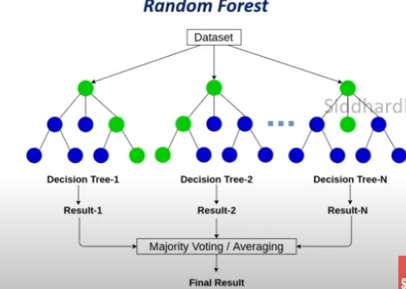

In [20]:
model=RandomForestRegressor(n_estimators=100)


In [22]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [23]:
prediction=model.predict(X_test)

In [24]:
prediction

array([168.70389971,  81.87510011, 116.04480053, 127.65220105,
       120.91240082, 154.77049819, 150.31049788, 126.05440042,
       117.56869865, 126.10030074, 116.9592011 , 172.39770048,
       141.13509879, 167.88189861, 115.15109999, 117.59440079,
       138.78870239, 170.29130085, 159.30380331, 158.21299932,
       155.07370032, 125.01200026, 175.14379984, 157.0789026 ,
       125.20510049,  93.8961997 ,  78.00090006, 120.44140008,
       119.10629942, 167.55479961,  88.14870056, 125.47340032,
        91.180701  , 117.76870046, 121.0106989 , 136.59580099,
       115.55540136, 115.14260064, 148.87779953, 107.24480098,
       104.31840243,  87.14229795, 126.49430109, 117.84900014,
       153.70239853, 119.51540007, 108.33169973, 108.05419819,
        93.20240072, 127.08299789,  74.99490045, 113.79899947,
       121.07220015, 111.39429921, 118.93729913, 120.73589921,
       158.98669871, 168.03470076, 147.03699689,  85.98399878,
        94.30610008,  86.7671984 ,  90.64330001, 118.67

In [27]:
#R square value
error=metrics.r2_score(Y_test,prediction)
error

0.9894791946589345

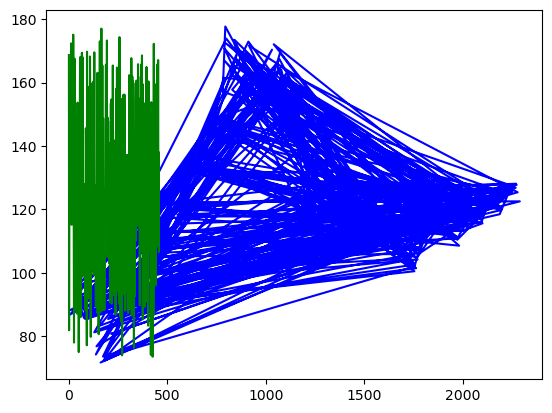

In [29]:
plt.plot(Y_test,color='blue',label='actual')#actual
plt.plot(prediction,color='green',label='predicted')#predicted
plt.show()